# Quantile Regression Example
Julian Hsu

10-August-2023

In [1]:
import pandas as pd
import numpy as np
import os as os 

from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib inline  

import statsmodels.api as sm

## DGP Functions

In [14]:
## Write a function to write simulated data that has a skew in outcomes explainable byu observed features
def dgp(N=1000, te=100, skew_var=1, X_random = 0.05):
    
    ## X1 is a normal variable
    x1 = np.random.normal(0,skew_var, N)
    
    ## X2 is bimodaly distributed
    x2 = np.zeros(N)
    x2[0: int(N/2)] = np.random.uniform(-5,-2, int(N/2))
    x2[-1*int(N/2):] = np.random.uniform(2,5, int(N/2))
    

    ## For a random X%, generate skewed outliers    
    random10 = int( N * X_random )    
    x1[0:random10] = np.random.uniform( np.percentile(x1,0.95),np.percentile(x1,0.95)*1.75, random10 )
    
    treatment_latent = 10*(x2-0.5)**2 + 10*x1
    m,s = np.average(treatment_latent), np.std(treatment_latent)
    treatment_latent = (treatment_latent - m) / s
    
    random_t = np.random.normal(0,1,N)
    
    treatment_latent += random_t
    
    treatment = np.array( np.exp(treatment_latent) / (1+ np.exp(treatment_latent)) > np.random.uniform(0,1,N) ).astype(np.int32)

    treatment[0:random10] = np.random.choice(2, random10)
    
    Y = 100 +1.5*x1 + 6*x2 + np.random.normal(0,1, N)

    GT = te
    Y += GT*(treatment==1) 
        
    df_est = pd.DataFrame({'x1':x1, 'x2':x2,'treatment':treatment, 'Y':Y, 'GT':GT} )
    return df_est

In [15]:
df = dgp(N=1000, te=5, skew_var=1, X_random = 0.05)


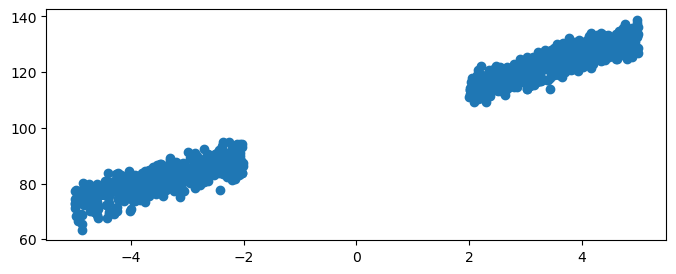

In [16]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,3))
ax.scatter(df['x2'], df['Y'])

In [22]:
median_quantile_reg = sm.QuantReg(endog=df['Y'], exog=sm.add_constant(df['x1']) ).fit(q=0.5)

In [23]:
median_quantile_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      Y   Pseudo R-squared:              0.04736
Model:                       QuantReg   Bandwidth:                       10.59
Method:                 Least Squares   Sparsity:                        122.6
Date:                Thu, 10 Aug 2023   No. Observations:                 1000
Time:                        21:18:45   Df Residuals:                      998
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.7336      1.966     53.791      0.000     101.876     109.591
x1             7.9547      1.608      4.946      0.000       4.798      11.111
==============================================================================
"""